## EDA

- https://www.kaggle.com/code/seventyfivebyte/eda-for-beginners

In [10]:

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

pd.options.display.max_columns = 999

In [11]:
df = pd.read_csv("../data/SeoulBikeData.csv", encoding="unicode_escape")

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
df.shape

(8760, 14)

In [14]:
print( df['Rented Bike Count'].describe() , "\n")
print( df['Hour'].describe() , "\n")
print( df['Seasons'].unique() , "\n")
print( df['Holiday'].unique() , "\n")
print( df['Functioning Day'].unique() , "\n")

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64 

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64 

['Winter' 'Spring' 'Summer' 'Autumn'] 

['No Holiday' 'Holiday'] 

['Yes' 'No'] 



In [15]:
df_corr1 = df[['Rented Bike Count', 'Seasons']]
df_corr1 = pd.get_dummies(df_corr1)
df_corr1.corr()

,Rented Bike Count,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Rented Bike Count,1.000000,0.102753,0.022888,0.296549,-0.424925
Seasons_Autumn,0.102753,1.000000,-0.334548,-0.334548,-0.329686
Seasons_Spring,0.022888,-0.334548,1.000000,-0.336996,-0.332099
Seasons_Summer,0.296549,-0.334548,-0.336996,1.000000,-0.332099
Seasons_Winter,-0.424925,-0.329686,-0.332099,-0.332099,1.000000


In [16]:
df_corr2 = df[['Rented Bike Count', 'Holiday']]
df_corr2 = pd.get_dummies(df_corr2)
df_corr2.corr()

,Rented Bike Count,Holiday_Holiday,Holiday_No Holiday
Rented Bike Count,1.000000,-0.072338,0.072338
Holiday_Holiday,-0.072338,1.000000,-1.000000
Holiday_No Holiday,0.072338,-1.000000,1.000000


In [17]:
df_corr3 = df[['Rented Bike Count', 'Functioning Day']]
df_corr3 = pd.get_dummies(df_corr3)
df_corr3.corr()

,Rented Bike Count,Functioning Day_No,Functioning Day_Yes
Rented Bike Count,1.000000,-0.203943,0.203943
Functioning Day_No,-0.203943,1.000000,-1.000000
Functioning Day_Yes,0.203943,-1.000000,1.000000


In [18]:
df_corr5 = df[['Rented Bike Count', 'Hour']]
df_corr5.corr()

,Rented Bike Count,Hour
Rented Bike Count,1.000000,0.410257
Hour,0.410257,1.000000


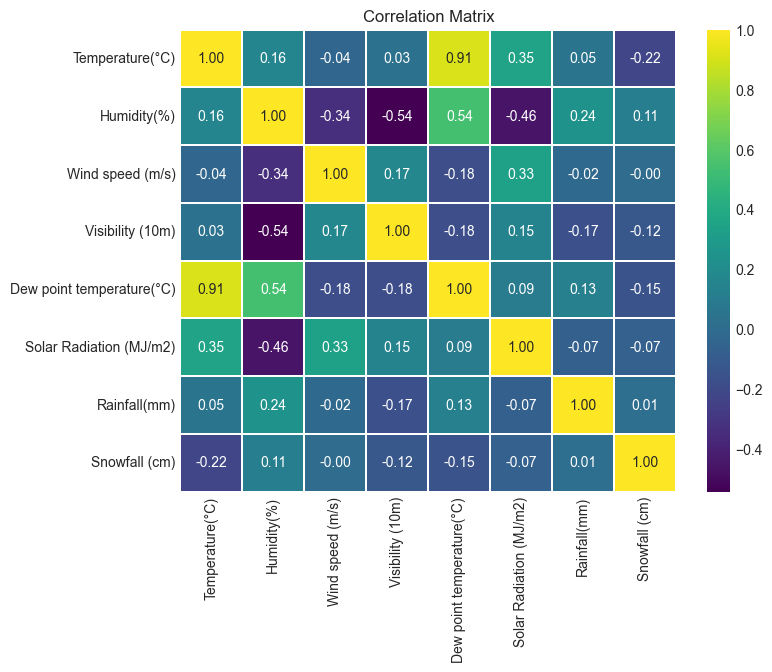

In [19]:
df_corr6 = df[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr6.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

season까지 추가해서 히트맵 구성

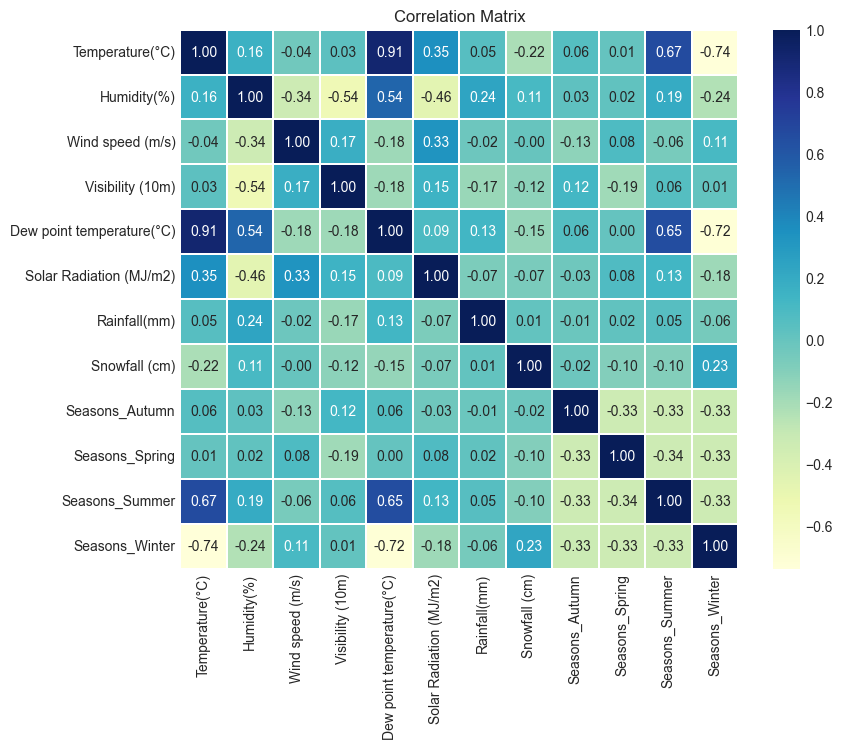

In [20]:
df_corr7 = df[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons']]
df_corr7 = pd.get_dummies(df_corr7)
plt.figure(figsize=(9, 7))
sns.heatmap(df_corr7.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()